### Required Libraries

In [243]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler

### Simple Linear Regression

#### Looking at data

In [85]:
data = pd.read_csv("../../Datasets/Linear Regression - Sheet1.csv")

In [86]:
data.head()

,X,Y
0,1,3.888889
1,2,4.555556
2,3,5.222222
3,4,5.888889
4,5,6.555556


In [87]:
#data.drop("Unnamed: 0", axis=1, inplace=True)

In [88]:
data.head()

,X,Y
0,1,3.888889
1,2,4.555556
2,3,5.222222
3,4,5.888889
4,5,6.555556


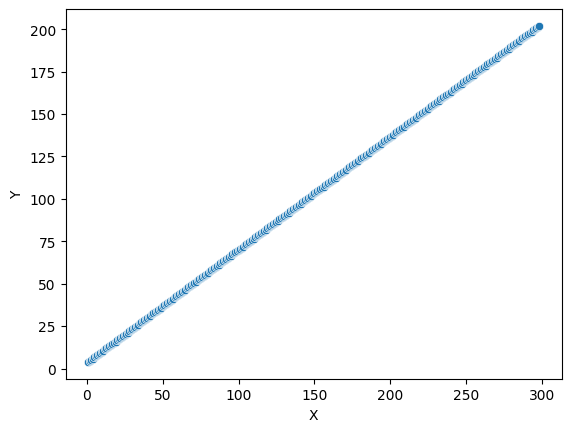

In [89]:
sns.scatterplot(x = 'X', y = 'Y', data=data)
plt.show()

#### Splitting the data for training and testing

In [90]:
y = data.Y
data.drop('Y', axis=1, inplace=True)

In [91]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=42, shuffle=False)

In [92]:
X_train.tail()

,X
233,234
234,235
235,236
236,237
237,238


In [93]:
X_test.head()

,X
238,239
239,240
240,241
241,242
242,243


#### Linear Regression Model

In [94]:
X_train.shape

(238, 1)

In [95]:
y_train.shape

(238,)

In [96]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)

LinearRegression()

In [101]:
y_pred = lin_reg_model.predict(X_test)

In [102]:
# Evaluate Model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.4f}')

Mean Squared Error: 0.0000


In [103]:
y_pred

array([162.55555557, 163.22222223, 163.8888889 , 164.55555557,
       165.22222223, 165.8888889 , 166.55555557, 167.22222223,
       167.8888889 , 168.55555557, 169.22222223, 169.8888889 ,
       170.55555557, 171.22222224, 171.8888889 , 172.55555557,
       173.22222224, 173.8888889 , 174.55555557, 175.22222224,
       175.8888889 , 176.55555557, 177.22222224, 177.8888889 ,
       178.55555557, 179.22222224, 179.8888889 , 180.55555557,
       181.22222224, 181.8888889 , 182.55555557, 183.22222224,
       183.8888889 , 184.55555557, 185.22222224, 185.8888889 ,
       186.55555557, 187.22222224, 187.8888889 , 188.55555557,
       189.22222224, 189.8888889 , 190.55555557, 191.22222224,
       191.8888889 , 192.55555557, 193.22222224, 193.8888889 ,
       194.55555557, 195.22222224, 195.8888889 , 196.55555557,
       197.22222224, 197.8888889 , 198.55555557, 199.22222224,
       199.8888889 , 200.55555557, 201.22222224, 201.8888889 ])

In [104]:
y_test

238    162.555556
239    163.222222
240    163.888889
241    164.555556
242    165.222222
243    165.888889
244    166.555556
245    167.222222
246    167.888889
247    168.555556
248    169.222222
249    169.888889
250    170.555556
251    171.222222
252    171.888889
253    172.555556
254    173.222222
255    173.888889
256    174.555556
257    175.222222
258    175.888889
259    176.555556
260    177.222222
261    177.888889
262    178.555556
263    179.222222
264    179.888889
265    180.555556
266    181.222222
267    181.888889
268    182.555556
269    183.222222
270    183.888889
271    184.555556
272    185.222222
273    185.888889
274    186.555556
275    187.222222
276    187.888889
277    188.555556
278    189.222222
279    189.888889
280    190.555556
281    191.222222
282    191.888889
283    192.555556
284    193.222222
285    193.888889
286    194.555556
287    195.222222
288    195.888889
289    196.555556
290    197.222222
291    197.888889
292    198.555556
293    199

### Multi Feature Linear Regression

#### Looking at the data

In [161]:
data = pd.read_csv("../../Datasets/possum.csv")

In [162]:
data.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [163]:
data.Pop.unique()

array(['Vic', 'other'], dtype=object)

In [164]:
data.sex.unique()

array(['m', 'f'], dtype=object)

In [165]:
data.shape

(104, 14)

In [166]:
data['Pop'] = (data['Pop'] == "Vic").astype(int)
data['Pop'].unique()

array([1, 0])

In [167]:
data['sex'] = (data['sex'] == "m").astype(int)
data['sex'].unique()

array([1, 0])

In [168]:
data.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,1,1,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,1,0,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,1,0,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,1,0,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,1,0,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [169]:
data.isnull().sum()

case        0
site        0
Pop         0
sex         0
age         2
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    1
earconch    0
eye         0
chest       0
belly       0
dtype: int64

In [170]:
data = data.dropna()

In [171]:
data.isnull().sum()

case        0
site        0
Pop         0
sex         0
age         0
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    0
earconch    0
eye         0
chest       0
belly       0
dtype: int64

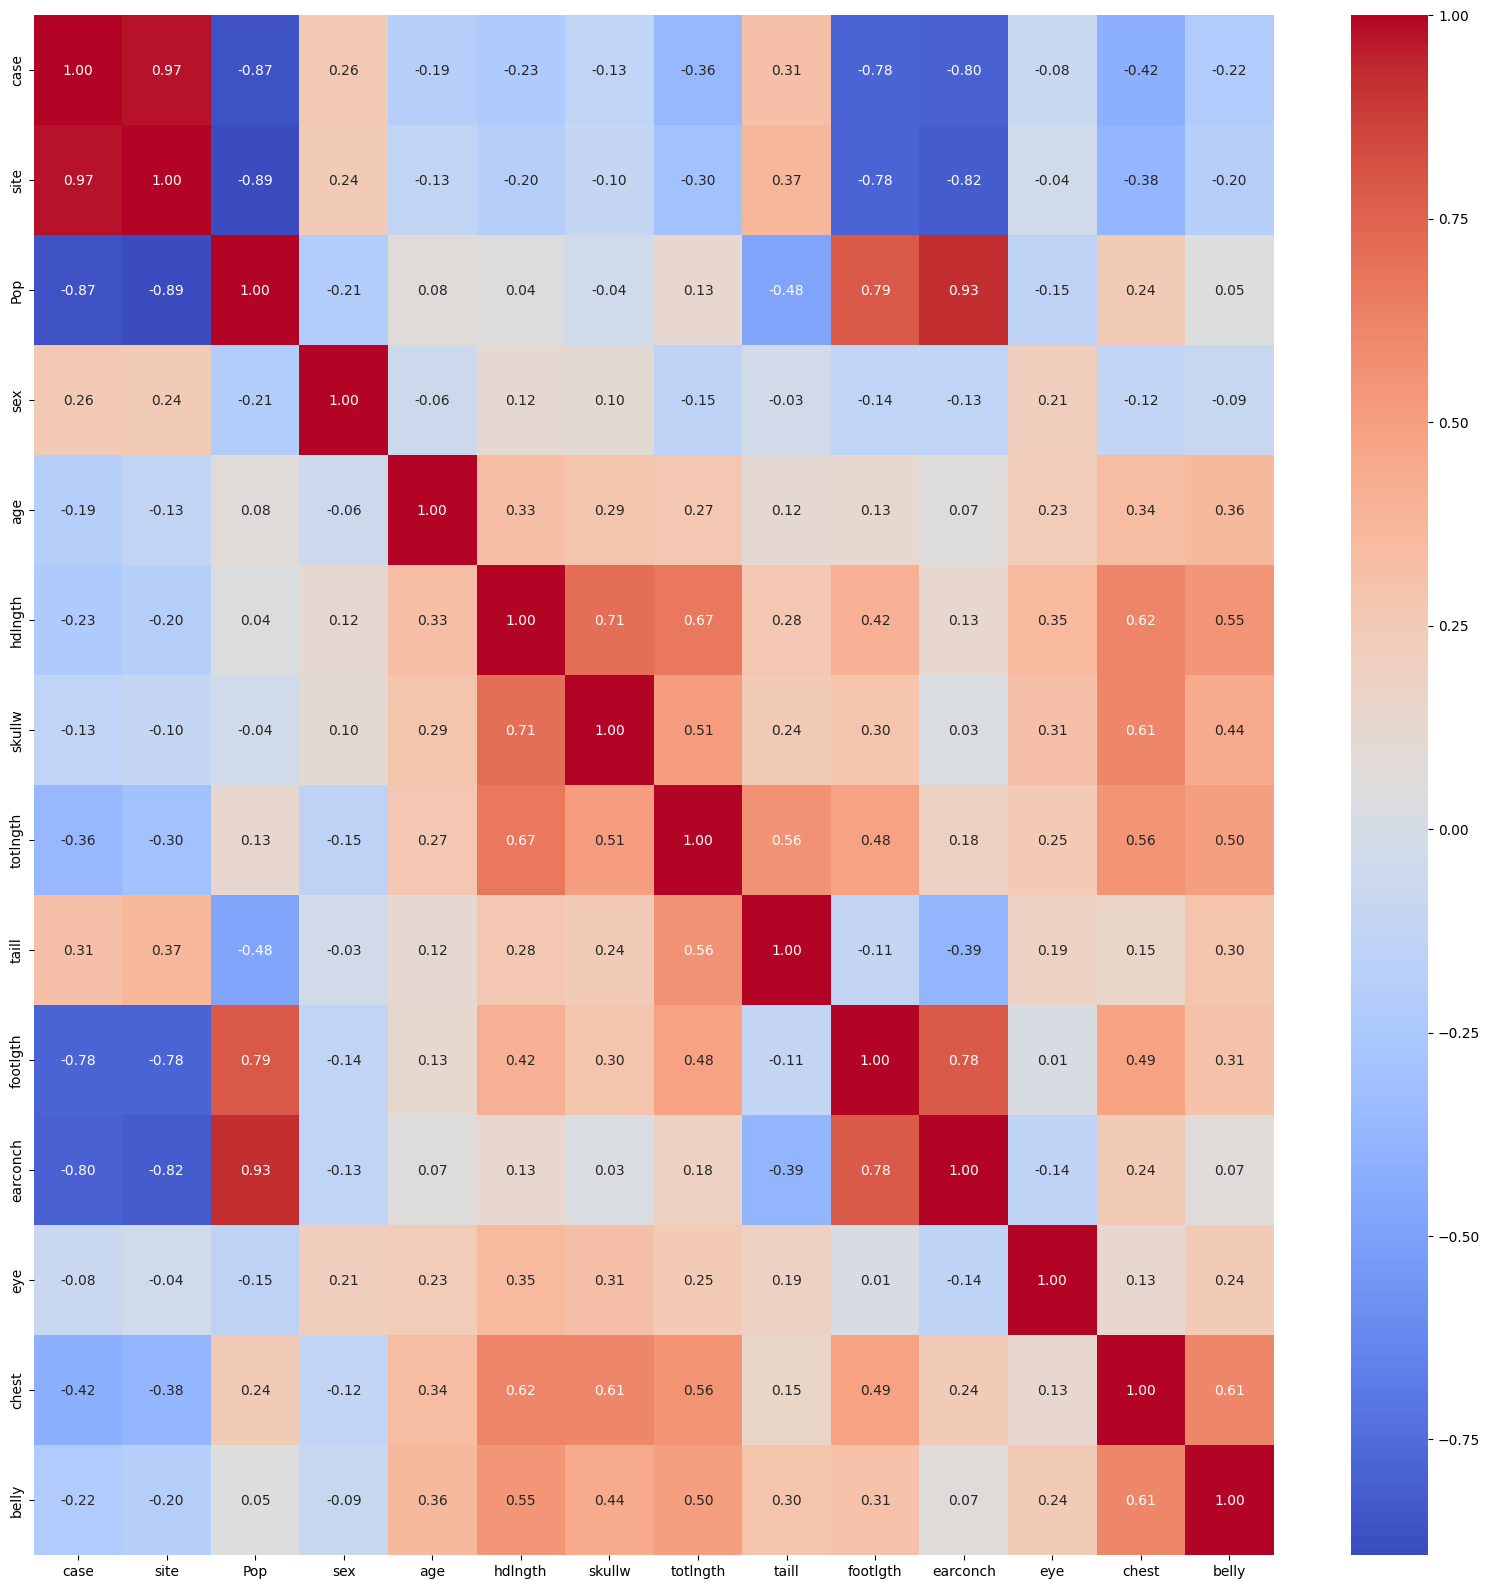

In [172]:
corr_matrix = data.corr()
plt.figure(figsize=(20, 20))  # Adjust the size to fit your dataset
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.show()

#### Splitting Data

In [173]:
data.head(0)

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly


In [174]:
y = data.age
data.drop('age', axis=1, inplace=True)

In [175]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=42, shuffle=False)

#### Model Linear

In [137]:
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression()

In [138]:
y_pred = lr_model.predict(X_test)

In [139]:
# Evaluate Model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.4f}')

Mean Squared Error: 3.3019


In [142]:
y_pred

array([2.76311702, 2.80701461, 2.82436206, 5.41643116, 3.78733867,
       3.09555719, 3.50316052, 4.03299989, 2.49879081, 3.06540383,
       3.16182877, 2.61041305, 3.66081099, 2.84244451, 3.00545989,
       3.82549511, 1.66945485, 2.99116367, 2.05288943, 2.32713482,
       3.29525438])

In [143]:
y_test

83     3.0
84     3.0
85     3.0
86     2.0
87     2.0
88     6.0
89     3.0
90     3.0
91     2.0
92     3.0
93     7.0
94     4.0
95     4.0
96     3.0
97     5.0
98     3.0
99     1.0
100    1.0
101    6.0
102    4.0
103    3.0
Name: age, dtype: float64

#### Model Polynomial

In [ ]:
# Transform Features for Polynomial Regression (Degree = 2)
#poly = PolynomialFeatures(degree=2, include_bias=False)  # No bias term
#X_train_poly = poly.fit_transform(X_train)
#X_test_poly = poly.transform(X_test)

In [177]:
ss = MinMaxScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

In [178]:
# Train Linear Regression Model on Transformed Features
poly_model = LinearRegression()
poly_model.fit(X_train_ss, y_train)

LinearRegression()

In [179]:
# Predictions
y_pred = poly_model.predict(X_test_ss)

In [180]:
# Evaluate Model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.4f}')

Mean Squared Error: 3.3019


In [181]:
y_pred

array([2.76311702, 2.80701461, 2.82436206, 5.41643116, 3.78733867,
       3.09555719, 3.50316052, 4.03299989, 2.49879081, 3.06540383,
       3.16182877, 2.61041305, 3.66081099, 2.84244451, 3.00545989,
       3.82549511, 1.66945485, 2.99116367, 2.05288943, 2.32713482,
       3.29525438])

In [182]:
y_test

83     3.0
84     3.0
85     3.0
86     2.0
87     2.0
88     6.0
89     3.0
90     3.0
91     2.0
92     3.0
93     7.0
94     4.0
95     4.0
96     3.0
97     5.0
98     3.0
99     1.0
100    1.0
101    6.0
102    4.0
103    3.0
Name: age, dtype: float64

### Using other models for Regression

#### Data

In [205]:
data = pd.read_csv("../../Datasets/kc_house_data.csv")

In [206]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [207]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [208]:
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [209]:
data.drop(['date','id', 'lat', 'long'], axis=1, inplace=True)

In [210]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503


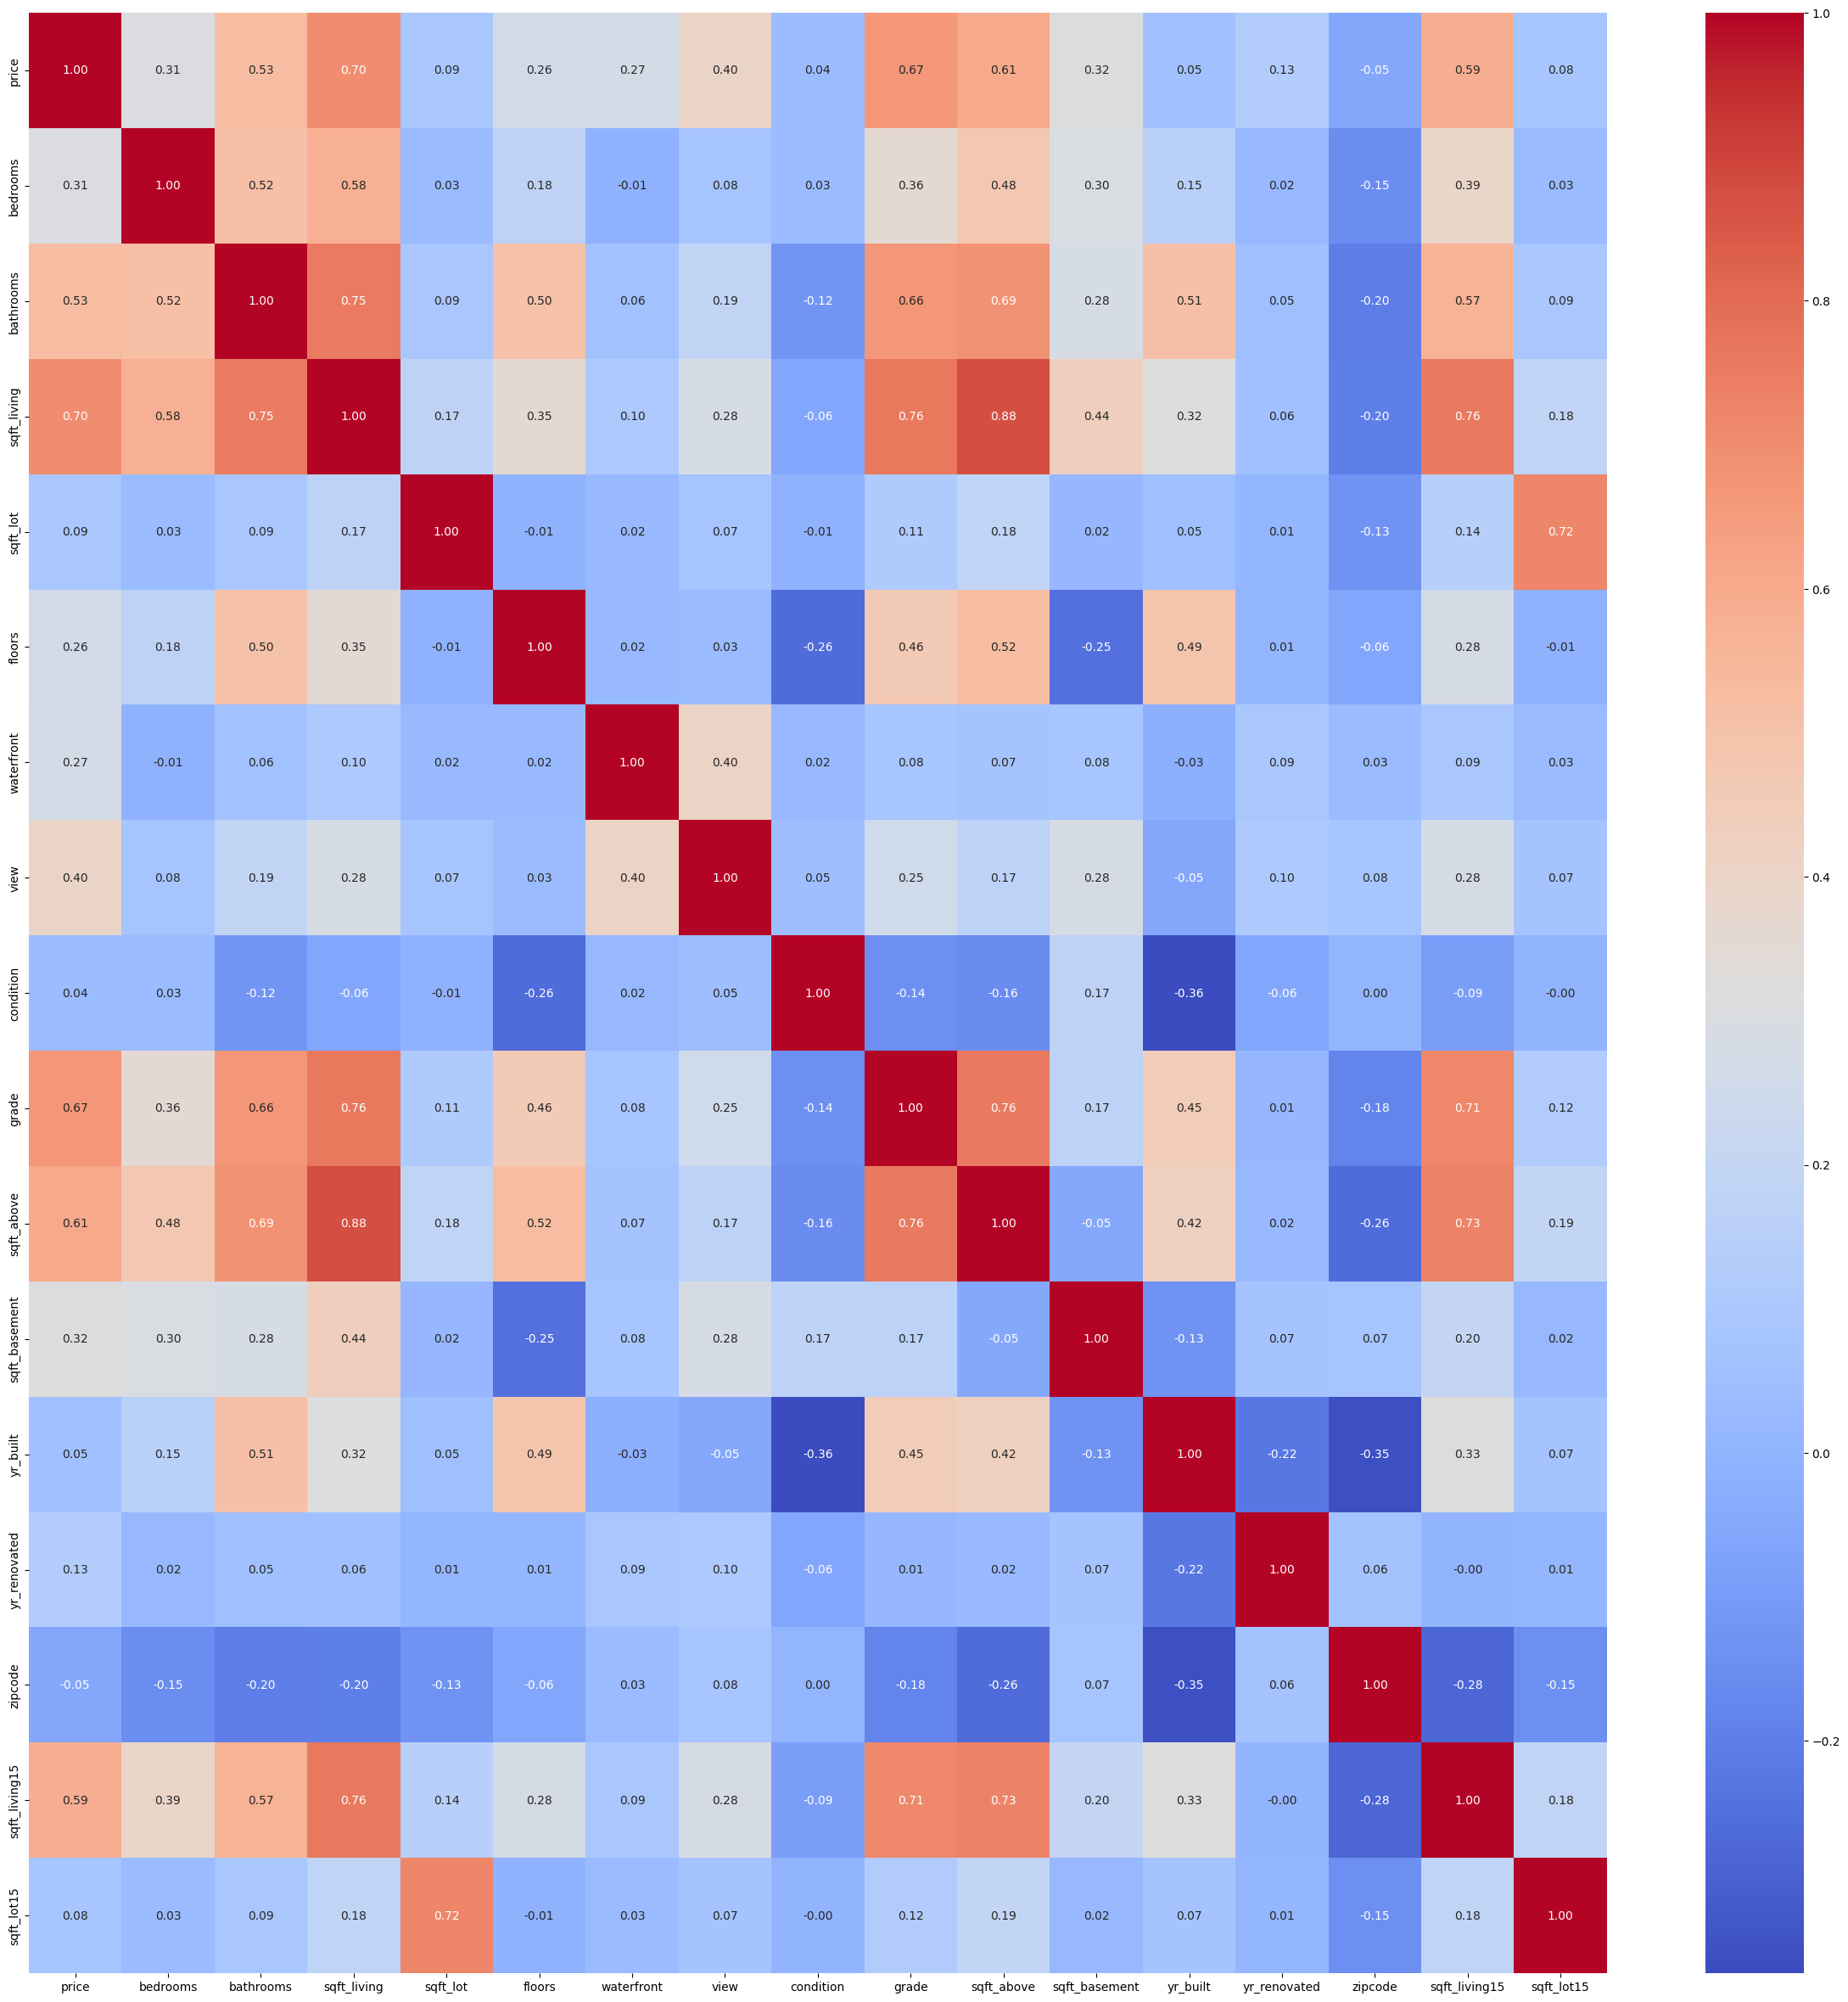

In [211]:
corr_matrix = data.corr()
plt.figure(figsize=(30, 30))  # Adjust the size to fit your dataset
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.show()

There are some features which don't correlate much to price : will removing them improve performance?

In [202]:
price = data.price
data.drop('price', axis=1, inplace=True)

#### Splitting the data

In [212]:
X_train, X_test, y_train, y_test = train_test_split(data, price, test_size=0.2, random_state=42, shuffle=False)

In [213]:
X_train.tail()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
17285,735000.0,4,2.50,2470,2550,3.0,0,0,3,8,2470,0,2004,0,98117,1270,3060
17286,378000.0,5,2.50,2760,8015,1.0,0,0,4,8,1600,1160,1960,0,98125,460,18000
17287,775000.0,3,2.00,2540,7200,1.5,0,3,4,8,1600,940,1905,0,98144,2040,5900
17288,2250000.0,3,4.25,5150,7800,2.5,0,2,3,11,4170,980,1954,0,98112,4270,7800
17289,1350000.0,4,4.50,3420,7440,3.0,0,0,3,9,3420,0,2014,0,98103,1360,5580


In [214]:
X_test.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
17290,380000.0,4,2.50,2270,11500,1.0,0,0,3,8,1540,730,1967,0,98034,2020,10918
17291,624900.0,4,2.50,2270,11500,1.0,0,0,3,8,1540,730,1967,0,98034,2020,10918
17292,379770.0,3,2.50,1470,1779,2.0,0,0,3,8,1160,310,2005,0,98029,1470,1576
17293,340000.0,3,1.75,1280,16200,1.0,0,0,3,8,1030,250,1976,0,98077,1160,10565
17294,515500.0,4,2.75,2830,8126,2.0,0,0,3,8,2830,0,2005,0,98059,2830,7916


#### Lin Reg

In [215]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [216]:
lr_model.score(X_test, y_test)

1.0

In [217]:
y_pred = lr_model.predict(X_test)

In [218]:
# Evaluate Model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.4f}')

Mean Squared Error: 0.0000


In [219]:
y_pred

array([380000., 624900., 379770., ..., 402101., 400000., 325000.],
      shape=(4323,))

In [220]:
y_test

17290    380000.0
17291    624900.0
17292    379770.0
17293    340000.0
17294    515500.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 4323, dtype: float64

#### Descision Tree

In [222]:
# Limit depth to avoid overfitting?
dt_model = DecisionTreeRegressor(max_depth=3)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [223]:
dt_model.score(X_test, y_test)

0.9490103457448594

In [224]:
y_pred = dt_model.predict(X_test)

In [225]:
# Evaluate Model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.4f}')

Mean Squared Error: 7002876791.5869


In [226]:
y_pred

array([410525.99561316, 580838.29535071, 410525.99561316, ...,
       410525.99561316, 410525.99561316, 256969.6035003 ], shape=(4323,))

In [227]:
y_test

17290    380000.0
17291    624900.0
17292    379770.0
17293    340000.0
17294    515500.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 4323, dtype: float64

#### Support Vector Machine

In [ ]:
data2 = pd.read_csv("../../Datasets/kc_house_data.csv")
data2.drop(['date','id', 'lat', 'long'], axis=1, inplace=True)
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data2)
data_scaled = pd.DataFrame(data_scaled)
data_scaled.head()

In [238]:
svr_model = SVR(kernel='rbf', C=100, epsilon=0.1)
svr_model.fit(X_train, y_train)

SVR(C=100)

In [239]:
svr_model.score(X_test, y_test)

0.41321105465224295

SVM models need scaled data to work

#### Random Forest

In [241]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # 100 trees
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [242]:
rf_model.score(X_test, y_test)

0.9999449605347649

wow

#### XGBoost

In [244]:
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [245]:
xgb_model.score(X_test,y_test)

0.9932391792680376

Not bad

#### RF wins!! (Atleast on non scaled data)

### To Do

1. Understand how each model works for regression - LR, DT, SVR, RF, XGB
2. Understand the parameters of these models and how it matters

#### LR

https://www.youtube.com/watch?v=7ArmBVF2dCs

1. R²	To check how well the model explains the data.
2. F-Value	To test if at least one feature is statistically significant.
3. P-Value	To test if individual features are important.

#### DT

#### SVR

#### RF

#### XGB